In [ ]:
# Importing libraries

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Generate synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define the model using NumPy

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = np.maximum(0, self.z1)  # ReLU activation
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        dZ2 = self.a2 - y.reshape(-1, 1)
        dW2 = np.dot(self.a1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dZ1 = np.dot(dZ2, self.W2.T) * (self.z1 > 0)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, batch_size, epochs, learning_rate):
        for _ in range(epochs):
            for i in range(0, X.shape[0], batch_size):
                X_batch = X[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                self.forward(X_batch)
                self.backward(X_batch, y_batch, learning_rate)

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

In [ ]:
# Hyperparameter search

batch_sizes = [2, 4]
learning_rates = [1e-3, 1e-5]
epochs_list = [1, 3, 5]

best_accuracy = 0
best_params = {}
best_model = None

for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        for epochs in epochs_list:
            model = SimpleNeuralNetwork(input_size=20, hidden_size=16, output_size=1)
            model.train(X_train, y_train, batch_size=batch_size, epochs=epochs, learning_rate=learning_rate)
            
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'batch_size': batch_size, 'learning_rate': learning_rate, 'epochs': epochs}
                best_model = model

print(f"Best parameters: {best_params}")

Best parameters: {'batch_size': 2, 'learning_rate': 1e-05, 'epochs': 5}


In [ ]:
# Evaluate on test set

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")

Test Accuracy: 0.5700
Test F1 Score: 0.5275


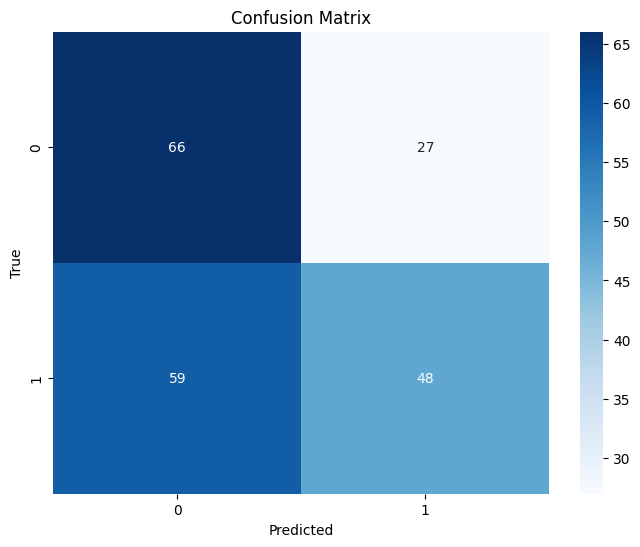

In [ ]:
# Plot confusion matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Show inputs, predictions, and truth values for 5 samples

sample_indices = np.random.choice(len(X_test), 5, replace=False)
for idx in sample_indices:
    input_sample = X_test[idx]
    true_label = y_test[idx]
    pred_prob = best_model.forward(input_sample.reshape(1, -1))[0][0]
    pred_label = int(pred_prob > 0.5)
    
    print(f"Sample {idx}:")
    print(f"Input: {input_sample}")
    print(f"True label: {true_label}")
    print(f"Predicted probability: {pred_prob:.4f}")
    print(f"Predicted label: {pred_label}")
    print()

Sample 29:
Input: [ 0.61672415 -1.37617403 -0.33933781  0.08739998 -0.33992379  1.00194979
 -0.1890738   2.18826803 -1.14024013  0.98790857  0.88788339  0.18231877
  2.79063221 -0.50069967  1.08260672  0.40312363  0.50014436  0.63880913
 -1.24678139  0.03474501]
True label: 1
Predicted probability: 0.4998
Predicted label: 0

Sample 142:
Input: [-2.59035176  0.10283638  0.4764539   0.32313836 -0.54154066  1.59492857
 -0.62388024 -3.26953222 -0.75811697  0.47266054 -0.48170418  1.36712876
 -1.7273379   0.07298053 -1.97544877  0.3025639   1.32739213  0.63634492
 -0.83480187 -0.37921185]
True label: 1
Predicted probability: 0.5001
Predicted label: 1

Sample 27:
Input: [ 2.17335372 -0.26586987  0.1750204  -0.90250274 -0.36666461  0.67810611
  0.76492095  0.38289473 -0.7479861  -2.09392891  0.44415412  0.54702531
  0.39588401  0.18582022 -0.34059688  0.00974103 -0.39178866  0.20711582
 -0.51014538  0.26165169]
True label: 0
Predicted probability: 0.4998
Predicted label: 0

Sample 162:
Input: